# COBAR Project 

Authors: Célia Benquet, Artur Jesslen & Léa Schmidt

## 1. Load the data

In [2]:
import pickle
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import signal


path_MDN = 'data/MDN/U3_f'
with open(path_MDN + '/MDN_U3_f_trackingData.pkl', 'rb') as f: 
    data_MDN = pickle.load(f)
    
path_SS = 'data/SS01540/U3_f'
with open(path_SS + '/SS01540_U3_f_trackingData.pkl', 'rb') as f: 
    data_SS = pickle.load(f)
    
path_PR = 'data/PR/U3_f'
with open(path_PR + '/PR_U3_f_trackingData.pkl', 'rb') as f: 
    data_PR = pickle.load(f)

In [3]:
data_MDN.head()

bodyparts                                                  Abdomen  \
coords                                                           x   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on1       1         200206_110534 0   0      73.963676   
                                                  1      69.640472   
                                                  2      68.444038   
                                                  3      69.041893   
                                                  4      69.084061   

bodyparts                                                            \
coords                                                            y   
stimulation exp_stage replicate datetime      fly frame               
p3-4        on1       1         200206_110534 0   0      102.580986   
                                                  1       91.774025   
                                                  2       90.962181   
                                                  3       91.408577   
                                                  4       91.067574   

bodyparts                                               LFbodyCoxa             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110534 0   0      68.130081  57.273956   
                                                  1      68.785461  44.428471   
                                                  2      69.432381  45.397675   
                                                  3      69.524467  45.782764   
                                                  4      70.101135  45.144413   

bodyparts                                                   LFclaw             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110534 0   0      56.071884  27.408962   
                                                  1      60.780922  16.183773   
                                                  2      62.511345  19.955723   
                                                  3      63.562450  20.809357   
                                                  4      63.124241  20.050495   

bodyparts                                               LFfemurTibia  \
coords                                                             x   
stimulation exp_stage replicate datetime      fly frame                
p3-4        on1       1         200206_110534 0   0        61.252773   
                                                  1        60.886108   
                                                  2        59.218887   
                                                  3        59.986305   
                                                  4        60.585194   

bodyparts                                                           \
coords                                                           y   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on1       1         200206_110534 0   0      50.340820   
                                                  1      36.126186   
                                                  2      38.603561   
                                                  3      39.225670   
                                                  4      38.117634   

bodyparts                                               LFtibiaTarsus  \
coords                                                              x   
stimulation exp_stage replicate datetime      fly frame                 
p3-4        on1       1         200206_110534 0   0         60.942657   
                                                  1         64.123833   
                                                  2         64.151230

In [4]:
data_SS.head()

bodyparts                                                  Abdomen             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      67.100021  93.758507   
                                                  1      68.479431  94.498413   
                                                  2      68.462341  93.471649   
                                                  3      67.922501  92.891617   
                                                  4      67.790977  93.322136   

bodyparts                                               LFbodyCoxa             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      65.629051  45.373863   
                                                  1      66.682732  45.218552   
                                                  2      66.493820  44.260029   
                                                  3      65.734764  43.840744   
                                                  4      65.604797  43.563110   

bodyparts                                                   LFclaw             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      52.873211  13.489688   
                                                  1      52.460300  13.051150   
                                                  2      51.982605  12.859521   
                                                  3      50.205418  12.965647   
                                                  4      50.946606  16.099878   

bodyparts                                               LFfemurTibia  \
coords                                                             x   
stimulation exp_stage replicate datetime      fly frame                
p3-4        on1       1         200206_110645 0   0        55.949085   
                                                  1        57.036797   
                                                  2        57.346359   
                                                  3        55.875118   
                                                  4        56.201073   

bodyparts                                                           \
coords                                                           y   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on1       1         200206_110645 0   0      36.431656   
                                                  1      36.413532   
                                                  2      36.394089   
                                                  3      36.418751   
                                                  4      35.850674   

bodyparts                                               LFtibiaTarsus  \
coords                                                              x   
stimulation exp_stage replicate datetime      fly frame                 
p3-4        on1       1         200206_110645 0   0         57.851021   
                                                  1         58.247894   
                                                  2         57.822842   
                                                  3         56.771000   
                                                  4         55.541519   

bodyparts                                                           ...  \
coords                                                           y  ...   
stimulation exp_stage replicate datetime      fly frame             ...   
p3-4        on1       1         200206_110645 0   0      26.462406  ...   
                              

In [5]:
data_PR

bodyparts                                                  Abdomen             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_111841 0   0      65.130417  90.493896   
                                                  1      66.375816  90.760017   
                                                  2      65.309357  92.018471   
                                                  3      67.772903  90.956497   
                                                  4      67.753204  92.759872   
                                                  5      68.097878  92.924911   
                                                  6      65.859573  94.021317   
                                                  7      66.798485  93.285812   
                                                  8      66.476990  91.582130   
                                                  9      66.896362  92.757599   
                                                  10     67.376328  92.490402   
                                                  11     68.637451  91.767242   
                                                  12     68.884895  93.837997   
                                                  13     68.356270  92.765701   
                                                  14     67.506523  93.149002   
                                                  15     67.638008  92.760513   
                                                  16     66.683029  92.518608   
                                                  17     66.952888  91.801170   
                                                  18     67.127602  91.826042   
                                                  19     68.333595  92.265297   
                                                  20     69.880371  93.770218   
                                                  21     69.160423  93.264824   
                                                  22     69.076385  93.171646   
                                                  23     68.028732  92.155029   
                                                  24     68.106308  92.633286   
                                                  25     66.864456  91.836449   
                                                  26     67.318604  92.390869   
                                                  27     66.992622  92.172195   
                                                  28     66.867706  92.141754   
                                                  29     67.037003  91.228020   
...                                                            ...        ...   
            off2      12        200206_154054 2   771    68.511627  91.355621   
                                                  772    68.513947  91.359772   
                                                  773    68.514374  91.363914   
                                                  774    68.484871  91.311569   
                                                  775    68.506889  91.367157   
                                                  776    68.451286  91.316650   
                                                  777    68.499374  91.291260   
                                                  778    68.521393  91.300720   
                                                  779    68.531097  91.314041   
                                                  780    68.508209  91.318214   
                                                  781    68.595573  91.332222   
                                                  782    68.587929  91.333908   
                                                  783    68.579346  91.336823   
                                                  784    68.545944  91.285034   
                                                  785    68.538574  91.314941   
                               

In [6]:
data_sort_MDN = data_MDN.copy()
data_sort_MDN = data_sort_MDN.reset_index()

data_sort_SS = data_SS.copy()
data_sort_SS = data_sort_SS.reset_index()

data_sort_PR = data_PR.copy()
data_sort_PR = data_sort_PR.reset_index()

In [7]:
replicate_MDN = [data_sort_MDN[data_sort_MDN['replicate']==1], data_sort_MDN[data_sort_MDN['replicate']==2],
             data_sort_MDN[data_sort_MDN['replicate']==3], data_sort_MDN[data_sort_MDN['replicate']==4], 
             data_sort_MDN[data_sort_MDN['replicate']==5], data_sort_MDN[data_sort_MDN['replicate']==6],
             data_sort_MDN[data_sort_MDN['replicate']==7], data_sort_MDN[data_sort_MDN['replicate']==8],
             data_sort_MDN[data_sort_MDN['replicate']==9], data_sort_MDN[data_sort_MDN['replicate']==10], 
             data_sort_MDN[data_sort_MDN['replicate']==11],data_sort_MDN[data_sort_MDN['replicate']==12]]

replicate_SS = [data_sort_SS[data_sort_SS['replicate']==1], data_sort_SS[data_sort_SS['replicate']==2],
             data_sort_SS[data_sort_SS['replicate']==3], data_sort_SS[data_sort_SS['replicate']==4], 
             data_sort_SS[data_sort_SS['replicate']==5], data_sort_SS[data_sort_SS['replicate']==6],
             data_sort_SS[data_sort_SS['replicate']==7], data_sort_SS[data_sort_SS['replicate']==8],
             data_sort_SS[data_sort_SS['replicate']==9], data_sort_SS[data_sort_SS['replicate']==10], 
             data_sort_SS[data_sort_SS['replicate']==11],data_sort_SS[data_sort_SS['replicate']==12]]

replicate_PR = [data_sort_PR[data_sort_PR['replicate']==1], data_sort_PR[data_sort_PR['replicate']==2],
             data_sort_PR[data_sort_PR['replicate']==3], data_sort_PR[data_sort_PR['replicate']==4], 
             data_sort_PR[data_sort_PR['replicate']==5], data_sort_PR[data_sort_PR['replicate']==6],
             data_sort_PR[data_sort_PR['replicate']==7], data_sort_PR[data_sort_PR['replicate']==8],
             data_sort_PR[data_sort_PR['replicate']==9], data_sort_PR[data_sort_PR['replicate']==10], 
             data_sort_PR[data_sort_PR['replicate']==11],data_sort_PR[data_sort_PR['replicate']==12]]

## 2. Question 1a

In [8]:
def calculate_position(num_replicate, replicate_name):
    replicate = replicate_name
    centerx = replicate[num_replicate]['center','posx']
    centery = replicate[num_replicate]['center','posy']
        
    final_position = [centerx , centery]
    return final_position
    

In [9]:
def calculate_position_fly(num_replicate, replicate_name):
    replicate = replicate_name
    center1 = calculate_position(num_replicate, replicate_name)
    center2 = calculate_position(num_replicate+1, replicate_name)
    center3 = calculate_position(num_replicate+2, replicate_name)
    center4 = calculate_position(num_replicate+3, replicate_name)
    
    final_position = [center1 , center2, center3, center4]
    return final_position

#### i. MDN data

In [10]:
center_MDN_1 = calculate_position_fly(0, replicate_MDN)
center_MDN_2 = calculate_position_fly(4, replicate_MDN)
center_MDN_3 = calculate_position_fly(8, replicate_MDN)

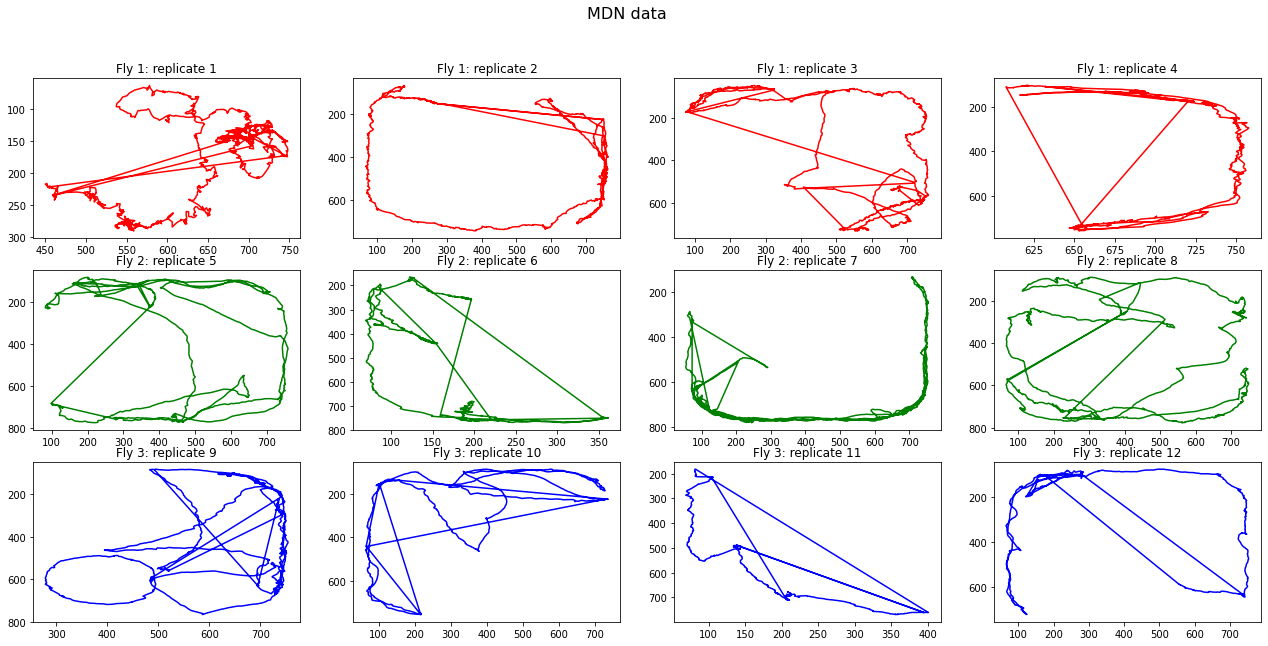

In [11]:
plt.figure(figsize=(22, 10))
plt.suptitle('MDN data', fontsize=16)

for i in range(1,5):
    plt.subplot(3,4,i) 
    plt.gca().invert_yaxis()
    plt.plot(center_MDN_1[i-1][0], center_MDN_1[i-1][1], color= 'r')
    plt.title('Fly 1: replicate ' + str(i))
    
for i in range(1,5):
    plt.subplot(3,4,i + 4) 
    plt.gca().invert_yaxis()
    plt.plot(center_MDN_2[i-1][0], center_MDN_2[i-1][1], color= 'g')
    plt.title('Fly 2: replicate ' + str(i+4))
    
for i in range(1,5):
    plt.subplot(3,4,i + 8) 
    plt.gca().invert_yaxis()
    plt.plot(center_MDN_3[i-1][0], center_MDN_3[i-1][1], color= 'b')
    plt.title('Fly 3: replicate ' + str(i+8))

Plot each graphs for each replicate. 
All the same color are for 1 fly.

#### ii. SS data

In [12]:
center_SS_1 = calculate_position_fly(0, replicate_SS)
center_SS_2 = calculate_position_fly(4, replicate_SS)
center_SS_3 = calculate_position_fly(8, replicate_SS)

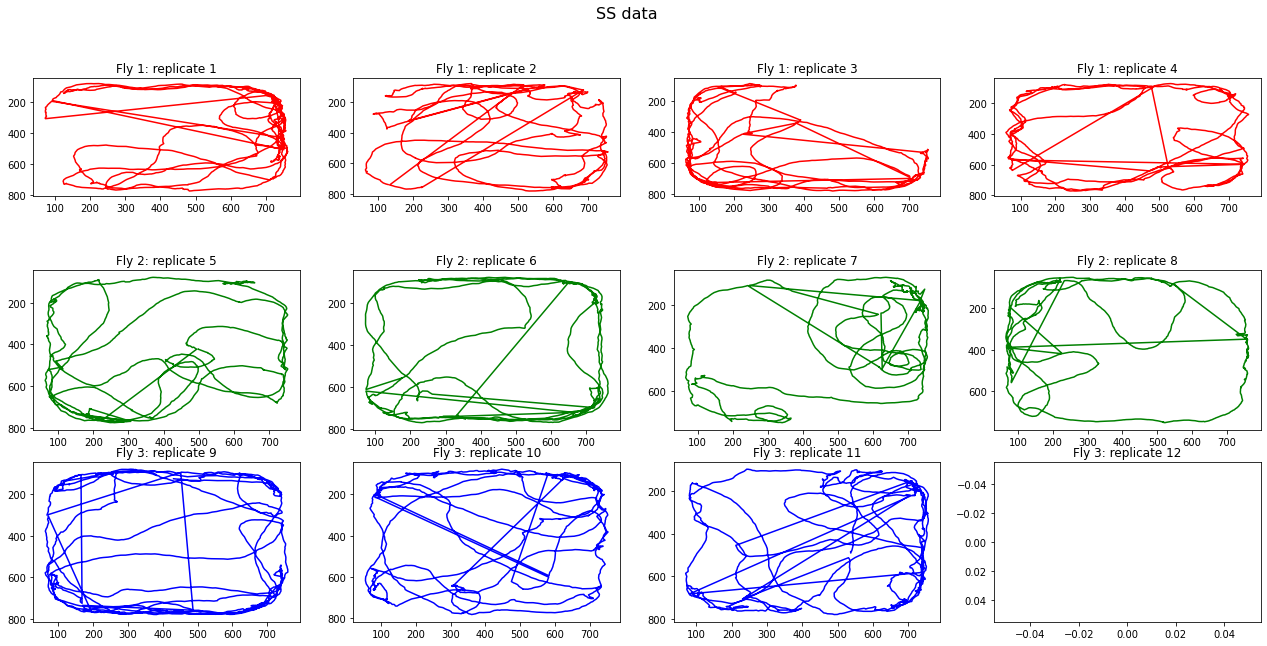

In [13]:
plt.figure(figsize=(22, 10))
plt.suptitle('SS data', fontsize=16)

for i in range(1,5):
    plt.subplot(4,4,i) 
    plt.gca().invert_yaxis()
    plt.plot(center_SS_1[i-1][0], center_SS_1[i-1][1], color= 'r')
    plt.title('Fly 1: replicate ' + str(i))

for i in range(1,5):
    plt.subplot(3,4,i + 4) 
    plt.gca().invert_yaxis()
    plt.plot(center_SS_2[i-1][0], center_SS_2[i-1][1], color= 'g')
    plt.title('Fly 2: replicate ' + str(i+4))
    
for i in range(1,5):
    plt.subplot(3,4,i + 8) 
    plt.gca().invert_yaxis()
    plt.plot(center_SS_3[i-1][0], center_SS_3[i-1][1], color= 'b')
    plt.title('Fly 3: replicate ' + str(i+8))
   

#### iii. PR data

In [14]:
center_PR_1 = calculate_position_fly(0, replicate_PR)
center_PR_2 = calculate_position_fly(4, replicate_PR)
center_PR_3 = calculate_position_fly(8, replicate_PR)

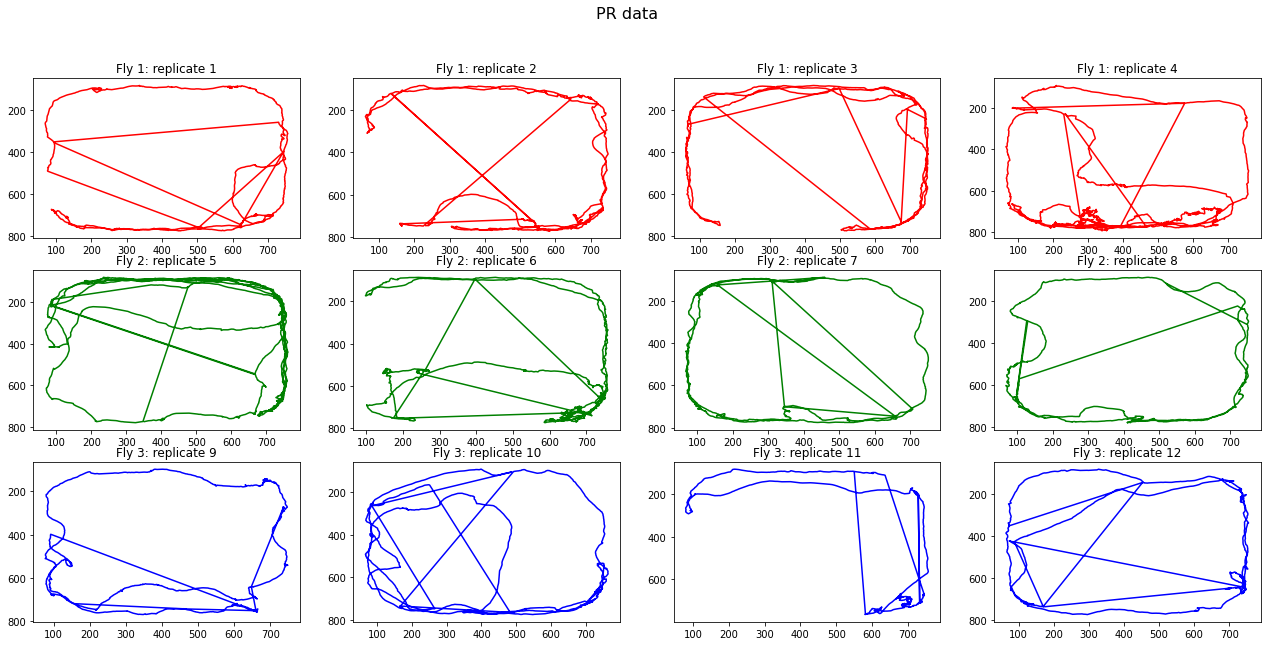

In [15]:
plt.figure(figsize=(22, 10))
plt.suptitle('PR data', fontsize=16)

for i in range(1,5):
    plt.subplot(3,4,i) 
    plt.gca().invert_yaxis()
    plt.plot(center_PR_1[i-1][0], center_PR_1[i-1][1], color= 'r')
    plt.title('Fly 1: replicate ' + str(i))
    
for i in range(1,5):
    plt.subplot(3,4,i + 4) 
    plt.gca().invert_yaxis()
    plt.plot(center_PR_2[i-1][0], center_PR_2[i-1][1], color= 'g')
    plt.title('Fly 2: replicate ' + str(i+4))
    
for i in range(1,5):
    plt.subplot(3,4,i + 8) 
    plt.gca().invert_yaxis()
    plt.plot(center_PR_3[i-1][0], center_PR_3[i-1][1], color= 'b')
    plt.title('Fly 3: replicate ' + str(i+8))

## 2. Question 1b

the forward / backward speed over time

In [16]:
def subtract_array_to_itself(data_frame):
    to_sub = data_frame.copy()
   
    #I don't understand why this doesn't work...
    #to_sub.shift(periods = 1, fill_value = 0)
    #to_sub.head(-1)
    
    return data_frame.subtract(to_sub.shift())

In [17]:
a = replicate_MDN[0]['center','posx_n']
b = subtract_array_to_itself(a)

b

0            NaN
1       0.382083
2       0.095042
3       0.293137
4       0.528966
5      -0.127447
6       0.379724
7       0.496188
8       0.217273
9       0.685721
10      3.219318
11      0.811955
12     -1.619344
13      3.941048
14      3.598945
15     -0.290092
16     -1.297281
17     -6.461996
18     -3.013513
19     -0.185928
20     -0.583350
21     -2.775719
22      5.399650
23     -0.114521
24     -1.079018
25      2.467907
26      1.286929
27      2.877869
28      8.068837
29      5.058930
          ...   
2360    0.190776
2361    0.928565
2362   -0.189737
2363   -0.494297
2364   -0.254516
2365   -0.023136
2366   -0.116852
2367    0.212366
2368   -0.172786
2369   -0.310718
2370    0.036012
2371   -0.218376
2372    0.055611
2373   -0.246862
2374    0.028810
2375   -0.031179
2376   -0.039238
2377    0.007239
2378   -0.120959
2379   -0.276578
2380   -0.371797
2381   -0.327492
2382   -0.487773
2383   -0.290968
2384   -0.293198
2385   -0.226055
2386   -0.332594
2387    0.9204

In [18]:
def calculate_speed(num_replicate, replicate_name):
    interval=1/80
    
    pos_x = subtract_array_to_itself(replicate_name[num_replicate]['center','posx_n'])
    pos_y = subtract_array_to_itself(replicate_name[num_replicate]['center','posy_n'])
    
    speed = np.sqrt(pos_x.pow(2)+ pos_y.pow(2))
    speed *= np.sign(replicate_name[num_replicate]['center','posx_n'])
    speed /= interval
    
    time = range(0,speed.shape[0])
    
    speed_over_time = [time, speed]
    
    return speed_over_time

In [19]:
def calculate_speed_fly(num_replicate, replicate_name):
    replicate = replicate_name
    speed1 = calculate_speed(num_replicate, replicate_name)
    speed2 = calculate_speed(num_replicate+1, replicate_name)
    speed3 = calculate_speed(num_replicate+2, replicate_name)
    speed4 = calculate_speed(num_replicate+3, replicate_name)
    
    final_speed = [speed1 , speed2, speed3, speed4]
    return final_speed

In [20]:
speed_replicate1 = calculate_speed_fly(0,replicate_MDN)
speed_replicate2 = calculate_speed_fly(4, replicate_MDN)
speed_replicate3 = calculate_speed_fly(8, replicate_MDN)

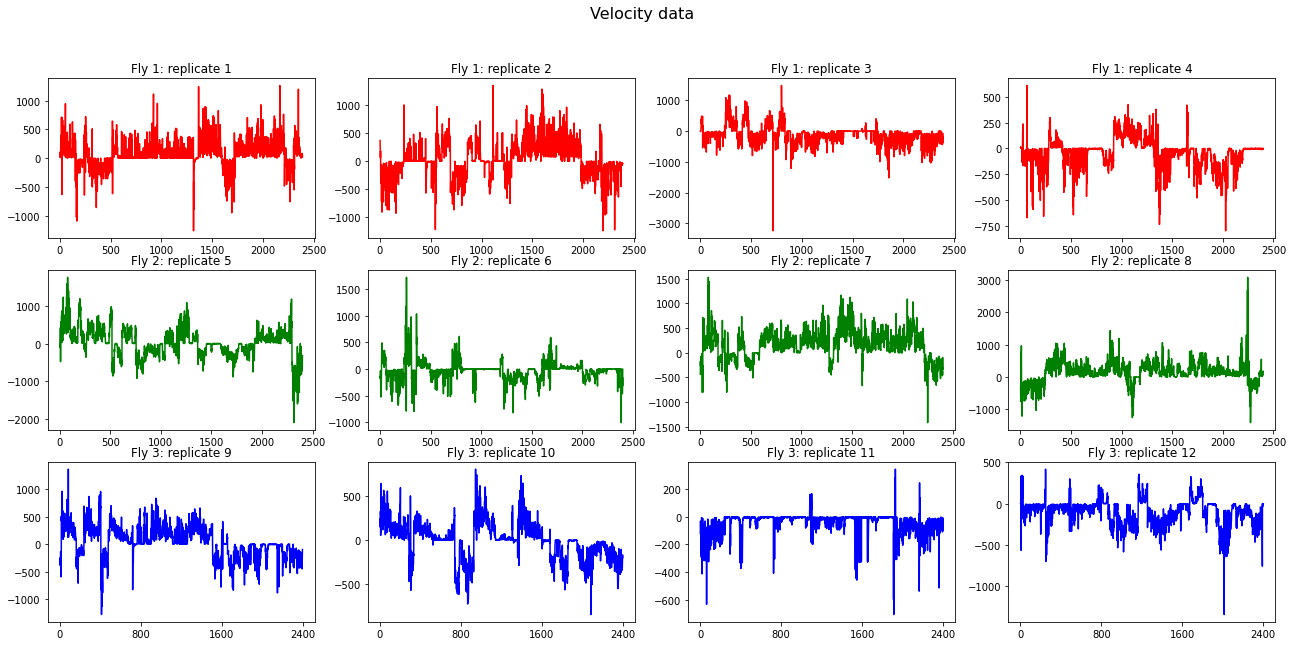

In [33]:
plt.figure(figsize=(22, 10))
plt.suptitle('Velocity data', fontsize=16)

for i in range(1,5):
    plt.subplot(3,4,i) 
    plt.plot(speed_replicate1[i-1][0], speed_replicate1[i-1][1], color= 'r')
    plt.title('Fly 1: replicate ' + str(i))
    
for i in range(1,5):
    plt.subplot(3,4,i + 4)
    plt.plot(speed_replicate2[i-1][0], speed_replicate2[i-1][1], color= 'g')
    plt.title('Fly 2: replicate ' + str(i+4))
    
for i in range(1,5):
    plt.subplot(3,4,i + 8) 
    plt.plot(speed_replicate3[i-1][0], speed_replicate3[i-1][1], color= 'b')
    positions = (range(0,2500,800))
    plt.xticks(positions)
    plt.title('Fly 3: replicate ' + str(i+8))